<a href="https://colab.research.google.com/github/tohnperfect/AIPrototype2023/blob/main/ML_for_Spanish_2_balanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [19]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
pathtothedataset = '/content/drive/MyDrive/SpanishLanguage Data'

Mounted at /content/drive


In [29]:
complete_list_df = pd.read_csv(os.path.join(pathtothedataset, 'Pcic60VarFinal.csv'))

In [30]:
complete_list_df = complete_list_df.drop(columns=['Unnamed: 0'])
complete_list_df.head()

,Palabra,Nivel,CorpesCnt,CorpesPM,CorpesN+1,CorpesLogFrec+1,percent_total,prevalZS,TiempoMedio,mean_Acc,...,Lev_N,num_letters,es_num_syll,CubCnt,Subfrec,SubLogFrec+1,Sublog_frqN,Claves,FrecAsoc,AsocLogFrec+1
0,a,1.0,8470172.0,24536.288,10.107949,4.389827,NaN,NaN,NaN,NaN,...,1.00,1.0,1.0,10445760.0,22579.974000,4.353743,4.353723,NaN,997.012633,3.998701
1,abierto,1.0,25098.0,72.704,4.300057,1.867491,100.000000,2.575829,778.550077,1.000000,...,1.80,7.0,3.0,21390.0,46.237482,1.674287,1.665014,293.0,138.563191,3.141648
2,abogado,1.0,26271.0,76.102,4.345129,1.887066,99.157303,2.216089,801.353623,0.994236,...,1.50,7.0,4.0,50651.0,109.489234,2.043320,2.039380,544.0,250.056091,3.398037
3,abril,1.0,31614.0,91.579,4.528062,1.966512,99.071207,2.191853,769.740984,0.993485,...,1.65,5.0,2.0,7295.0,15.769165,1.224511,1.197868,40.0,19.729196,2.295109
4,abrir,1.0,150805.0,436.850,6.081876,2.641325,99.377593,2.284815,748.138229,0.997845,...,1.65,5.0,2.0,30726.0,66.418555,1.828779,1.822304,317.0,152.786565,3.184085


In [31]:
complete_list_df.shape

(9906, 65)

In [32]:
threshold = 0.5
complete_list_df_dropmisrows50 = complete_list_df.dropna(thresh=len(complete_list_df)*threshold, axis=1)

In [25]:
# prompt: count number of Nivel

nivel_counts = complete_list_df_dropmisrows50['Nivel'].value_counts()
nivel_counts

,count
Nivel,
3.5,2866
3.0,2420
2.5,2174
2.0,1228
1.5,612
1.0,606


## we remove these columns

In [51]:
set(complete_list_df.columns) - set(complete_list_df_dropmisrows50.columns)

{'ActivaciónMed',
 'AscoMed',
 'ConcretnessLab',
 'FelizMed',
 'FuriaMed',
 'ImagLab',
 'MiedoMed',
 'SER',
 'SER2',
 'TristeMed',
 'ValenciaMed'}

In [39]:
com35 = complete_list_df_dropmisrows50[complete_list_df_dropmisrows50['Nivel']==3.5]

In [47]:
com35

,Palabra,Nivel,CorpesCnt,CorpesPM,CorpesN+1,CorpesLogFrec+1,percent_total,prevalZS,TiempoMedio,mean_Acc,...,Lev_N,num_letters,es_num_syll,CubCnt,Subfrec,SubLogFrec+1,Sublog_frqN,Claves,FrecAsoc,AsocLogFrec+1
7040,abandono,3.5,7980.0,23.116,3.182876,1.382305,99.651568,2.388899,913.102564,0.996350,...,2.10,8.0,4.0,2747.0,5.938025,0.841236,0.773800,349.0,161.045299,3.206948
7041,abanico,3.5,3342.0,9.681,2.368466,1.028612,99.431818,2.303513,885.759146,0.993939,...,1.85,7.0,4.0,707.0,1.528280,0.402825,0.184817,34.0,15.599830,2.193120
7042,abarcar,3.5,10609.0,30.732,3.457326,1.501497,98.507463,2.058395,925.984076,0.987421,...,1.65,7.0,3.0,219.0,0.473399,0.168320,-0.322794,32.0,14.682192,2.166791
7043,abastecedor,3.5,273.0,0.791,0.582774,0.253096,97.064220,1.824156,1044.663158,0.979381,...,2.60,11.0,5.0,57.0,0.123213,0.050462,-0.901789,4.0,1.835274,1.263701
7044,abastecer,3.5,3029.0,8.774,2.279726,0.990072,98.898072,2.146687,899.854227,0.991329,...,1.75,9.0,4.0,314.0,0.678755,0.224987,-0.166906,20.0,9.176370,1.962671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9901,zarpar,3.5,903.0,2.616,1.285368,0.558228,97.230770,1.846423,971.755102,0.973510,...,1.40,6.0,2.0,1300.0,2.810132,0.580940,0.449061,4.0,1.835274,1.263701
9902,zarrapastroso,3.5,90.0,0.261,0.231905,0.100715,NaN,NaN,NaN,NaN,...,4.35,13.0,5.0,7.0,0.015131,0.006522,-1.762127,NaN,NaN,NaN
9903,zas,3.5,338.0,0.979,0.682592,0.296446,NaN,NaN,NaN,NaN,...,1.00,3.0,1.0,557.0,1.204034,0.343218,0.081418,NaN,1.376456,1.138762
9904,zoco,3.5,155.0,0.449,0.370874,0.161068,63.235290,0.334581,962.022364,0.657563,...,1.55,4.0,2.0,9.0,0.019455,0.008368,-1.665217,NaN,NaN,NaN


In [82]:
com35 = com35.dropna(thresh=com35.shape[1]*0.93)

In [83]:
com3 = complete_list_df_dropmisrows50[complete_list_df_dropmisrows50['Nivel']==3]
com3 = com3.dropna(thresh=com3.shape[1]*0.98)

In [84]:
com25 = complete_list_df_dropmisrows50[complete_list_df_dropmisrows50['Nivel']==2.5]
com25 = com25.dropna()

In [85]:
com2 = complete_list_df_dropmisrows50[complete_list_df_dropmisrows50['Nivel']==2]
com2 = com2.dropna(thresh=com2.shape[1]*0.99)

In [86]:
com15 = complete_list_df_dropmisrows50[complete_list_df_dropmisrows50['Nivel']==1.5]

In [87]:
com1 = complete_list_df_dropmisrows50[complete_list_df_dropmisrows50['Nivel']==1]

In [108]:
# prompt: sample 100 rows from com35 com3 com25 com2 com15 com1 to make the testset and the rest as the traininset

import pandas as pd

# Sample 100 rows from each dataframe
com35_sampled = com35.sample(n=min(100, len(com35)))
com3_sampled = com3.sample(n=min(100, len(com3)))
com25_sampled = com25.sample(n=min(100, len(com25)))
com2_sampled = com2.sample(n=min(100, len(com2)))
com15_sampled = com15.sample(n=min(100, len(com15)))
com1_sampled = com1.sample(n=min(100, len(com1)))

# Concatenate the sampled dataframes to create the test set
testset = pd.concat([com35_sampled, com3_sampled, com25_sampled, com2_sampled, com15_sampled, com1_sampled])

# Create the trainset by removing the test set rows from the original dataframes
trainset = pd.concat([com35.drop(com35_sampled.index),
                      com3.drop(com3_sampled.index),
                      com25.drop(com25_sampled.index),
                      com2.drop(com2_sampled.index),
                      com15.drop(com15_sampled.index),
                      com1.drop(com1_sampled.index)])

In [118]:
testset

,Palabra,Nivel,CorpesCnt,CorpesPM,CorpesN+1,CorpesLogFrec+1,percent_total,prevalZS,TiempoMedio,mean_Acc,...,Lev_N,num_letters,es_num_syll,CubCnt,Subfrec,SubLogFrec+1,Sublog_frqN,Claves,FrecAsoc,AsocLogFrec+1
9389,redimir,3.5,1355.0,3.925,1.594324,0.692406,94.174760,1.532741,929.181495,0.952542,...,1.8,7.0,3.0,237.0,0.512309,0.179640,-0.288640,11.0,5.047004,1.703034
9105,peón,3.5,2444.0,7.080,2.089392,0.907411,98.769770,2.115838,793.745826,0.987179,...,1.3,4.0,2.0,1517.0,3.279208,0.631363,0.516055,59.0,27.070292,2.432493
8150,engullir,3.5,1402.0,4.061,1.621564,0.704236,93.437500,1.476024,987.231618,0.957746,...,1.9,8.0,3.0,143.0,0.309115,0.116978,-0.506854,10.0,4.588185,1.661641
7391,bacteria,3.5,8572.0,24.831,3.251575,1.412141,99.653979,2.389938,847.172043,0.996429,...,2.4,8.0,3.0,1146.0,2.477240,0.541235,0.394347,162.0,74.787418,2.873829
9426,relieve,3.5,4339.0,12.569,2.607788,1.132548,97.651010,1.907082,845.093863,0.989286,...,2.1,7.0,3.0,291.0,0.629037,0.211931,-0.199834,52.0,26.152655,2.417516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,año,1.0,761080.0,2204.687,7.698794,3.343544,99.675325,2.399253,762.661130,0.996689,...,1.0,3.0,2.0,136594.0,295.267072,2.471683,2.470218,360.0,207.385969,3.316779
73,caliente,1.0,15713.0,45.517,3.839818,1.667612,99.017682,2.177411,774.695297,0.993902,...,1.6,8.0,3.0,35246.0,76.189168,1.887556,1.881906,778.0,374.395908,3.573331
405,octavo,1.0,8598.0,24.907,3.254513,1.413417,99.665550,2.394962,857.697917,1.000000,...,1.7,6.0,3.0,2335.0,5.047430,0.781571,0.703256,14.0,7.341096,1.865761
251,gente,1.0,138976.0,402.584,6.000385,2.605934,98.939929,2.157209,728.505576,0.992620,...,1.2,5.0,2.0,398764.0,861.984265,2.936003,2.935500,2316.0,1158.975568,4.064074


In [119]:
trainset

,Palabra,Nivel,CorpesCnt,CorpesPM,CorpesN+1,CorpesLogFrec+1,percent_total,prevalZS,TiempoMedio,mean_Acc,...,Lev_N,num_letters,es_num_syll,CubCnt,Subfrec,SubLogFrec+1,Sublog_frqN,Claves,FrecAsoc,AsocLogFrec+1
7040,abandono,3.5,7980.0,23.116,3.182876,1.382305,99.651568,2.388899,913.102564,0.996350,...,2.10,8.0,4.0,2747.0,5.938025,0.841236,0.773800,349.0,161.045299,3.206948
7042,abarcar,3.5,10609.0,30.732,3.457326,1.501497,98.507463,2.058395,925.984076,0.987421,...,1.65,7.0,3.0,219.0,0.473399,0.168320,-0.322794,32.0,14.682192,2.166791
7052,abono,3.5,2777.0,8.044,2.202102,0.956361,99.732620,2.425339,872.557065,0.997290,...,1.50,5.0,3.0,952.0,2.057881,0.485421,0.313876,52.0,24.317381,2.385917
7061,abstracción,3.5,2457.0,7.117,2.093961,0.909396,99.671053,2.397372,981.106007,0.996479,...,2.80,11.0,3.0,132.0,0.285336,0.109017,-0.541365,26.0,11.929281,2.076614
7066,abuso,3.5,11909.0,34.498,3.569476,1.550204,99.649123,2.387848,812.355311,0.996350,...,1.55,5.0,3.0,4086.0,8.832462,0.992662,0.946188,390.0,183.068587,3.262614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,vuelta,1.0,52278.0,151.438,5.026758,2.183093,99.851410,2.485359,777.035881,1.000000,...,1.70,6.0,2.0,100836.0,217.971144,2.340387,2.338403,272.0,173.892217,3.240280
602,web,1.0,23591.0,68.338,4.238993,1.840971,NaN,NaN,NaN,NaN,...,1.80,3.0,1.0,5736.0,12.399168,1.127078,1.093468,78.0,42.211303,2.625429
603,y,1.0,9842522.0,28511.694,10.258105,4.455038,NaN,NaN,NaN,NaN,...,1.25,1.0,1.0,7641362.0,16517.874740,4.217980,4.217954,117.0,419.818941,3.623062
604,yo,1.0,430840.0,1248.052,7.130140,3.096581,NaN,NaN,NaN,NaN,...,1.00,2.0,1.0,2133592.0,4612.058087,3.663989,3.663895,2089.0,1003.894910,4.001688


In [120]:
testset.to_csv('/content/drive/MyDrive/SpanishLanguage Data/testset.csv', index=False)
trainset.to_csv('/content/drive/MyDrive/SpanishLanguage Data/trainingset.csv', index=False)

## Your code start here

In [111]:
trainset=trainset.drop(columns=['max_lem_lemma','max_lem_cat'])
testset=testset.drop(columns=['max_lem_lemma','max_lem_cat'])

In [112]:
# prompt: remove columns with highly correlated

import pandas as pd
import numpy as np

# ... (your existing code)

# Remove correlated columns
def remove_correlated_columns(df, threshold=0.95):
    """
    Removes highly correlated columns from a Pandas DataFrame.

    Args:
        df: The input DataFrame.
        threshold: The correlation threshold above which columns are considered correlated.

    Returns:
        A new DataFrame with highly correlated columns removed.
    """
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    return df.drop(columns=to_drop)


trainset_no_corr = remove_correlated_columns(trainset.iloc[:,1:])
trainset_no_corr.shape

(3414, 30)

In [113]:
set(testset.columns) - set(trainset_no_corr.columns)

{'CedeL2LexFrec',
 'ContDiv',
 'ContDivLogFrec+1',
 'ContDivZs',
 'CorpesLogFrec+1',
 'CorpesPM',
 'CubCnt',
 'EdaMZs',
 'FrecAsoc',
 'FrecCedel2',
 'FrecMElelex',
 'FrecOrPM',
 'FrecSElelex',
 'Palabra',
 'SubLogFrec+1',
 'Subfrec',
 'Sublog_frqN',
 'log_frqN',
 'mean_Acc',
 'mean_Acc_zs',
 'num_letters',
 'zipf'}

In [114]:
trainset_no_corr=trainset_no_corr.fillna(0)

In [115]:
trainset_no_corr.shape

(3414, 30)

In [102]:
testset

,Palabra,Nivel,CorpesCnt,CorpesPM,CorpesN+1,CorpesLogFrec+1,percent_total,prevalZS,TiempoMedio,mean_Acc,...,Lev_N,num_letters,es_num_syll,CubCnt,Subfrec,SubLogFrec+1,Sublog_frqN,Claves,FrecAsoc,AsocLogFrec+1
9565,sentenciar,3.5,7400.0,21.436,3.110667,1.350945,98.106060,1.981814,959.329004,0.978814,...,1.70,10.0,3.0,115.0,0.248589,0.096419,-0.600759,10.0,4.588185,1.661641
9104,peña,3.5,1409.0,4.082,1.625705,0.706035,98.113210,1.983080,805.578947,0.980159,...,1.20,4.0,2.0,634.0,1.370480,0.374836,0.137557,16.0,9.176370,1.962671
7860,decretar,3.5,4430.0,12.833,2.627057,1.140916,97.378277,1.866939,945.497976,0.976285,...,1.55,8.0,3.0,80.0,0.172931,0.069273,-0.756732,12.0,5.505822,1.740822
7097,acosar,3.5,2646.0,7.665,2.159292,0.937769,98.219585,2.002302,873.676101,0.984520,...,1.50,6.0,3.0,586.0,1.266721,0.355398,0.103421,70.0,32.576115,2.512899
7268,apreciable,3.5,1169.0,3.386,1.478418,0.642069,99.466667,2.315968,906.266476,0.994302,...,2.05,10.0,4.0,65.0,0.140507,0.057098,-0.845673,8.0,4.129367,1.615883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,después,1.0,278524.0,806.825,6.694345,2.907317,100.000000,2.575829,756.575251,1.000000,...,2.85,7.0,2.0,318550.0,688.590463,2.838591,2.837962,363.0,176.186310,3.245972
291,invierno,1.0,14197.0,41.126,3.740665,1.624550,99.272727,2.250772,821.463878,1.000000,...,1.90,8.0,3.0,13715.0,29.646894,1.486386,1.472011,955.0,441.842230,3.645267
590,verdura,1.0,8229.0,23.838,3.212375,1.395117,98.830410,2.130166,808.993939,0.996979,...,1.90,7.0,3.0,712.0,1.539088,0.404678,0.187873,765.0,353.749075,3.548695
512,séptimo,1.0,7768.0,22.503,3.157128,1.371123,99.310340,2.262683,804.776978,0.992857,...,2.20,7.0,3.0,3173.0,6.858884,0.895361,0.836390,26.0,11.929281,2.076614


In [103]:
testset = testset.drop(columns=['Palabra'])

In [105]:
# prompt: train random forests regression on the trainset and test on the testset. for testset, select only features that silimar to the testset and fillna with 0

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Select features present in both trainset and testset
common_features = list(set(trainset.columns) & set(testset.columns))
common_features.remove('Nivel')
X_train = trainset[common_features]
y_train = trainset['Nivel']

X_test = testset[common_features].fillna(0)
y_test = testset['Nivel']

# Initialize and train the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-Square: {mse}")

Mean Squared Error: 0.3439967083333333
R-Square: 0.3439967083333333


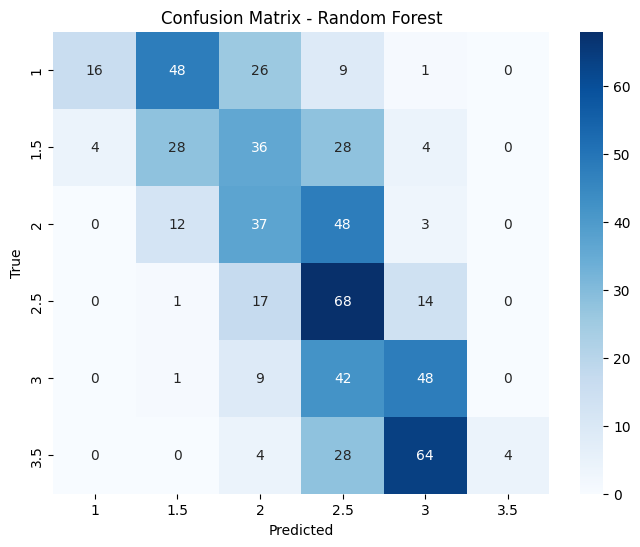

In [117]:
import matplotlib.pyplot as plt

allowed_levels = [1, 1.5, 2, 2.5, 3, 3.5]

# Function to round predictions to the nearest allowed level
def round_to_nearest_level(predictions):
    rounded_predictions = []
    for prediction in predictions:
        distances = np.abs(np.array(allowed_levels) - prediction)
        nearest_level_index = np.argmin(distances)
        rounded_predictions.append(allowed_levels[nearest_level_index])
    return np.array(rounded_predictions)

# Round the predictions
y_pred_str = round_to_nearest_level(y_pred).astype(str)
y_test_str = round_to_nearest_level(y_test).astype(str)

from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (your existing code)

# Calculate confusion matrices
cm_rf = confusion_matrix(y_test_str,y_pred_str)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=allowed_levels, yticklabels=allowed_levels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()